# Importing Libraries

In [39]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import re
import string
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Importing Dataset

In [40]:
data = pd.read_csv("Datasets/amazon.csv")

# EDA

In [41]:
data.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [4]:
data.isnull().sum()

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [5]:
data = data.dropna()

In [6]:
data.isnull().sum()

Unnamed: 0              0
reviewerName            0
overall                 0
reviewText              0
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

# Data Visualization

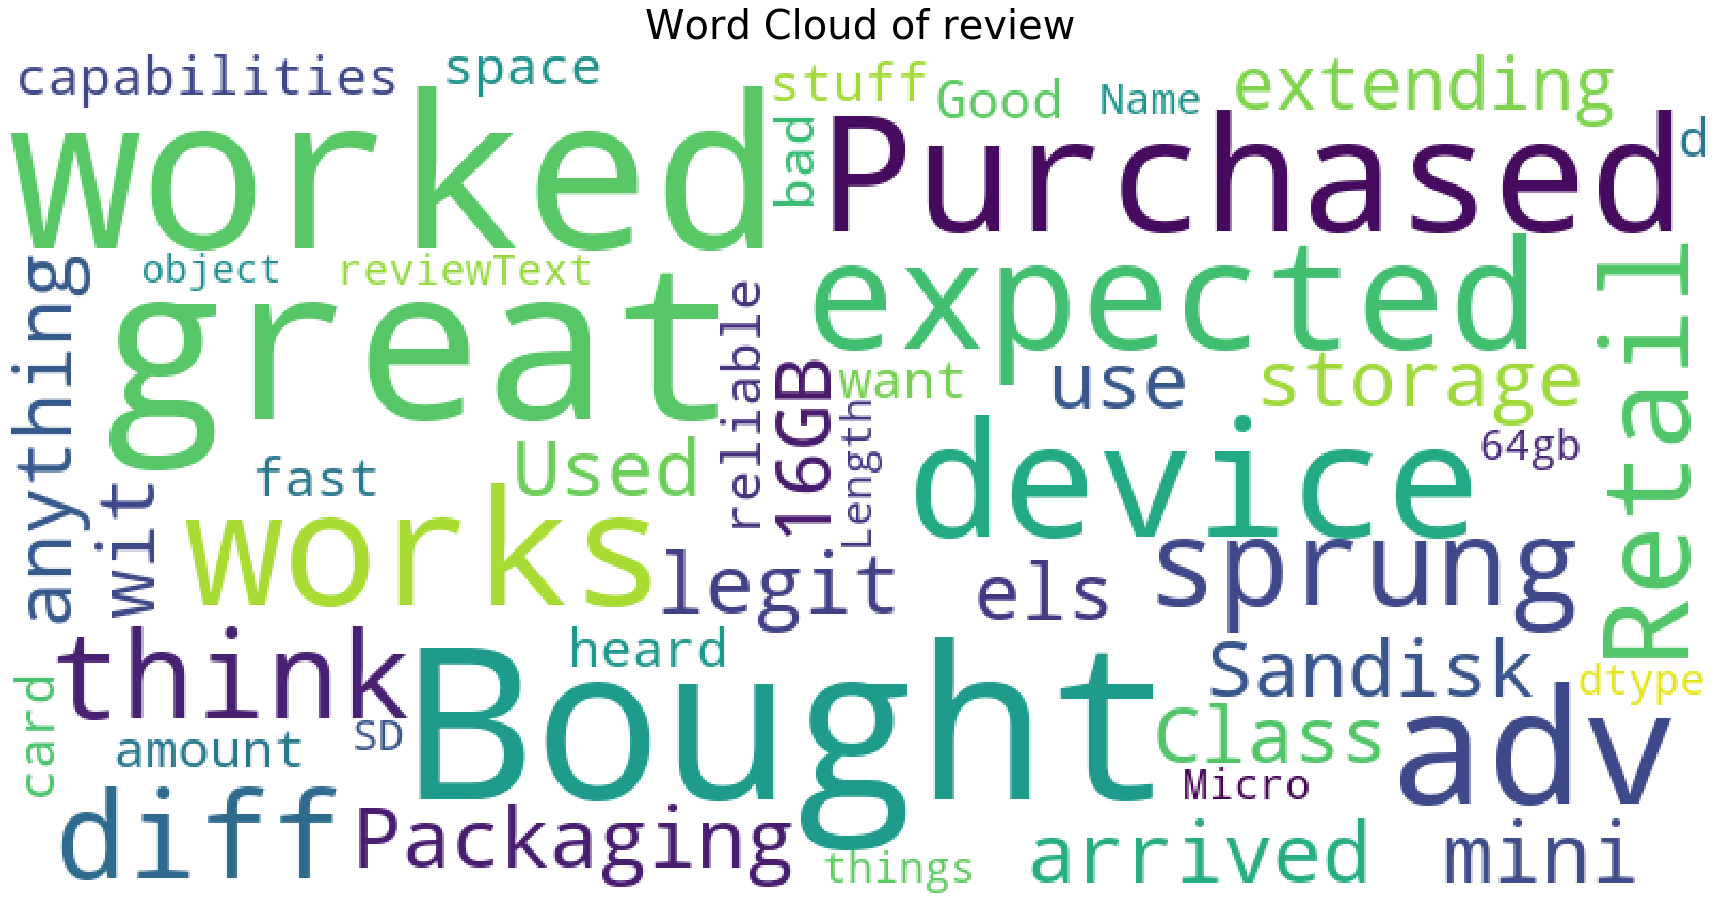

In [7]:
 
from wordcloud import WordCloud, STOPWORDS


def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(data["reviewText"], title="Word Cloud of review")

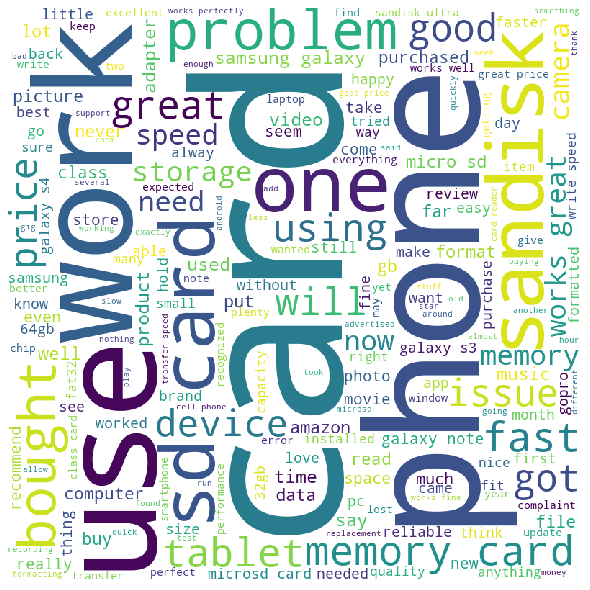

In [8]:
df = data
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.reviewText:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

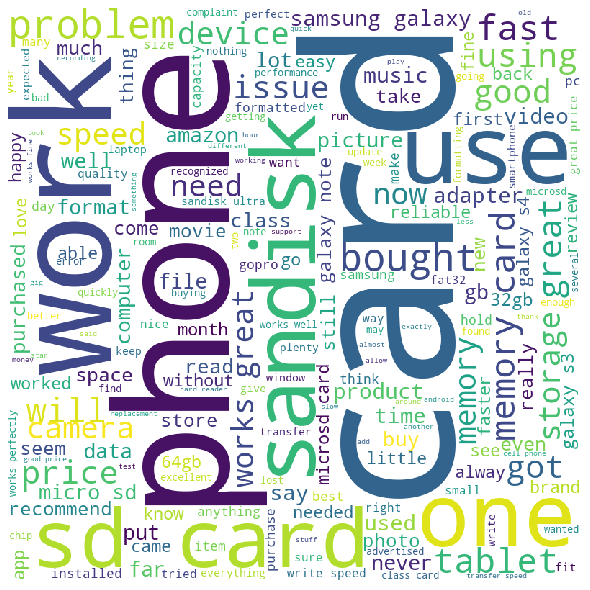

In [9]:
df = data
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.reviewText:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Data Cleaning 

In [10]:
data['reviewText'][1]

'Purchased this for my device, it worked as advertised. You can never have too much phone memory, since I download a lot of stuff this was a no brainer for me.'

In [11]:
# remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# '[%s]' % re.escape(string.punctuation),' ' - replace punctuation with white space
# .lower() - convert all strings to lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
data['reviewText'] = data['reviewText'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [12]:
data['reviewText'][1]

'purchased this for my device  it worked as advertised  you can never have too much phone memory  since i download a lot of stuff this was a no brainer for me '

# NLP

In [13]:
sid = SentimentIntensityAnalyzer()

In [14]:
data['scores'] = data['reviewText'].apply(lambda reviewText: sid.polarity_scores(reviewText))

In [15]:
data

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,scores
1,1,0mie,5.0,purchased this for my device it worked as adv...,2013-10-25,409,0,0,0,0,0.0,0.0,"{'neg': 0.068, 'neu': 0.932, 'pos': 0.0, 'comp..."
2,2,1K3,4.0,it works as expected i should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0,"{'neg': 0.07, 'neu': 0.93, 'pos': 0.0, 'compou..."
3,3,1m2,5.0,this think has worked out great had a diff br...,2013-11-21,382,0,0,0,0,0.0,0.0,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp..."
4,4,2&amp;1/2Men,5.0,bought it with retail packaging arrived legit...,2013-07-13,513,0,0,0,0,0.0,0.0,"{'neg': 0.037, 'neu': 0.84, 'pos': 0.123, 'com..."
5,5,2Cents!,5.0,it s mini storage it doesn t do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,i bought this sandisk class to use with my...,2013-07-23,503,0,0,0,0,0.0,0.0,"{'neg': 0.082, 'neu': 0.781, 'pos': 0.137, 'co..."
4911,4911,Zo,5.0,used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0,"{'neg': 0.0, 'neu': 0.939, 'pos': 0.061, 'comp..."
4912,4912,Z S Liske,5.0,great card that is very fast and reliable it ...,2014-03-31,252,0,0,0,0,0.0,0.0,"{'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'comp..."
4913,4913,Z Taylor,5.0,good amount of space for the stuff i want to d...,2013-09-16,448,0,0,0,0,0.0,0.0,"{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'comp..."


In [16]:
data['compound']  = data['scores'].apply(lambda score_dict: score_dict['compound'])

In [17]:
data

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,scores,compound
1,1,0mie,5.0,purchased this for my device it worked as adv...,2013-10-25,409,0,0,0,0,0.0,0.0,"{'neg': 0.068, 'neu': 0.932, 'pos': 0.0, 'comp...",-0.2960
2,2,1K3,4.0,it works as expected i should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0,"{'neg': 0.07, 'neu': 0.93, 'pos': 0.0, 'compou...",-0.3089
3,3,1m2,5.0,this think has worked out great had a diff br...,2013-11-21,382,0,0,0,0,0.0,0.0,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp...",0.9201
4,4,2&amp;1/2Men,5.0,bought it with retail packaging arrived legit...,2013-07-13,513,0,0,0,0,0.0,0.0,"{'neg': 0.037, 'neu': 0.84, 'pos': 0.123, 'com...",0.7087
5,5,2Cents!,5.0,it s mini storage it doesn t do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,i bought this sandisk class to use with my...,2013-07-23,503,0,0,0,0,0.0,0.0,"{'neg': 0.082, 'neu': 0.781, 'pos': 0.137, 'co...",0.5729
4911,4911,Zo,5.0,used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0,"{'neg': 0.0, 'neu': 0.939, 'pos': 0.061, 'comp...",0.1761
4912,4912,Z S Liske,5.0,great card that is very fast and reliable it ...,2014-03-31,252,0,0,0,0,0.0,0.0,"{'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'comp...",0.8481
4913,4913,Z Taylor,5.0,good amount of space for the stuff i want to d...,2013-09-16,448,0,0,0,0,0.0,0.0,"{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'comp...",0.4939


In [18]:
data['label'] = data['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

In [19]:
data

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,scores,compound,label
1,1,0mie,5.0,purchased this for my device it worked as adv...,2013-10-25,409,0,0,0,0,0.0,0.0,"{'neg': 0.068, 'neu': 0.932, 'pos': 0.0, 'comp...",-0.2960,neg
2,2,1K3,4.0,it works as expected i should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0,"{'neg': 0.07, 'neu': 0.93, 'pos': 0.0, 'compou...",-0.3089,neg
3,3,1m2,5.0,this think has worked out great had a diff br...,2013-11-21,382,0,0,0,0,0.0,0.0,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp...",0.9201,pos
4,4,2&amp;1/2Men,5.0,bought it with retail packaging arrived legit...,2013-07-13,513,0,0,0,0,0.0,0.0,"{'neg': 0.037, 'neu': 0.84, 'pos': 0.123, 'com...",0.7087,pos
5,5,2Cents!,5.0,it s mini storage it doesn t do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,i bought this sandisk class to use with my...,2013-07-23,503,0,0,0,0,0.0,0.0,"{'neg': 0.082, 'neu': 0.781, 'pos': 0.137, 'co...",0.5729,pos
4911,4911,Zo,5.0,used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0,"{'neg': 0.0, 'neu': 0.939, 'pos': 0.061, 'comp...",0.1761,pos
4912,4912,Z S Liske,5.0,great card that is very fast and reliable it ...,2014-03-31,252,0,0,0,0,0.0,0.0,"{'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'comp...",0.8481,pos
4913,4913,Z Taylor,5.0,good amount of space for the stuff i want to d...,2013-09-16,448,0,0,0,0,0.0,0.0,"{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'comp...",0.4939,pos


# Model Building 

In [20]:
X = data['reviewText']
y = data['label']

In [21]:
X

1       purchased this for my device  it worked as adv...
2       it works as expected  i should have sprung for...
3       this think has worked out great had a diff  br...
4       bought it with retail packaging  arrived legit...
5       it s mini storage   it doesn t do anything els...
                              ...                        
4910    i bought this sandisk   class   to use with my...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable  it ...
4913    good amount of space for the stuff i want to d...
4914    i ve heard bad things about this   micro sd ca...
Name: reviewText, Length: 4913, dtype: object

In [22]:
y

1       neg
2       neg
3       pos
4       pos
5       pos
       ... 
4910    pos
4911    pos
4912    pos
4913    pos
4914    pos
Name: label, Length: 4913, dtype: object

In [23]:
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

In [24]:
y

array([0, 0, 1, ..., 1, 1, 1])

In [25]:
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(X).toarray()

In [26]:
joblib.dump(cv, "cv.pkl")

['cv.pkl']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
y_train

array([1, 1, 1, ..., 1, 1, 0])

# Algorithms Used 

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
predictions = LR.predict(X_test)
val1 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for LR: ", val1, "\n")
print("*Confusion Matrix for LR: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for LR: ")
print(classification_report(y_test, predictions))

*Accuracy score for LR:  88.50457782299085 

*Confusion Matrix for LR: 
[[ 48  81]
 [ 32 822]]
*Classification Report for LR: 
              precision    recall  f1-score   support

           0       0.60      0.37      0.46       129
           1       0.91      0.96      0.94       854

    accuracy                           0.89       983
   macro avg       0.76      0.67      0.70       983
weighted avg       0.87      0.89      0.87       983



C:\Users\Public\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
val2 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for RF: ", val2, "\n")
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for RF: ")
print(classification_report(y_test, predictions))

*Accuracy score for RF:  87.99593082400814 

*Confusion Matrix for RF: 
[[ 13 116]
 [  2 852]]
*Classification Report for RF: 
              precision    recall  f1-score   support

           0       0.87      0.10      0.18       129
           1       0.88      1.00      0.94       854

    accuracy                           0.88       983
   macro avg       0.87      0.55      0.56       983
weighted avg       0.88      0.88      0.84       983



# Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
predictions = GNB.predict(X_test)
val3 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for GNB: ", val3, "\n")
print("*Confusion Matrix for GNB: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for GNB: ")
print(classification_report(y_test, predictions))

*Accuracy score for GNB:  36.724313326551375 

*Confusion Matrix for GNB: 
[[ 94  35]
 [587 267]]
*Classification Report for GNB: 
              precision    recall  f1-score   support

           0       0.14      0.73      0.23       129
           1       0.88      0.31      0.46       854

    accuracy                           0.37       983
   macro avg       0.51      0.52      0.35       983
weighted avg       0.79      0.37      0.43       983



# SVM

In [34]:
from sklearn.svm import LinearSVC
SVM = LinearSVC(random_state=0, tol=1e-5)
SVM.fit(X_train, y_train)
predictions = SVM.predict(X_test)
val4 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for SVM: ", val4, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for SVM: ")
print(classification_report(y_test, predictions))

*Accuracy score for SVM:  86.57171922685656 

*Confusion Matrix for SVM: 
[[ 61  68]
 [ 64 790]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.49      0.47      0.48       129
           1       0.92      0.93      0.92       854

    accuracy                           0.87       983
   macro avg       0.70      0.70      0.70       983
weighted avg       0.86      0.87      0.86       983



C:\Users\Public\anaconda\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


# Voting Classifier

In [35]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
estimator = []
estimator.append(('RF', 
                  RandomForestClassifier()))
estimator.append(('SVC', LinearSVC(random_state=0, tol=1e-5)))
estimator.append(('GNB', GaussianNB()))
estimator.append(('LR', LogisticRegression()))


  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
predictions = vot_hard.predict(X_test)
  
val5 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Voting Classifier: ", val5, "\n")
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for Voting Classifier: ")
print(classification_report(y_test, predictions))

C:\Users\Public\anaconda\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


*Accuracy score for Voting Classifier:  86.6734486266531 

*Confusion Matrix for Voting Classifier: 
[[ 56  73]
 [ 58 796]]
*Classification Report for Voting Classifier: 
              precision    recall  f1-score   support

           0       0.49      0.43      0.46       129
           1       0.92      0.93      0.92       854

    accuracy                           0.87       983
   macro avg       0.70      0.68      0.69       983
weighted avg       0.86      0.87      0.86       983



C:\Users\Public\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Accuracy Comparison

In [36]:
score = [val1,val2,val3,val4,val5]
classifier = ('Logistic Regression', 'Random Forest', 'Naive Bayes','SVM','Voting Classifier')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4]
[88.50457782299085, 87.99593082400814, 36.724313326551375, 86.57171922685656, 86.6734486266531]


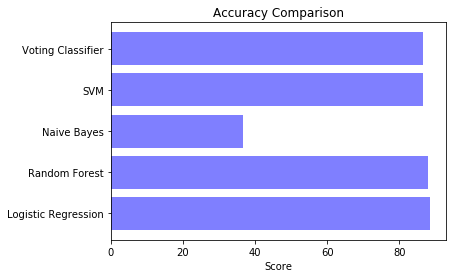

In [37]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Accuracy Comparison')
plt2.show()

# Logistic Regression got the highest Accuracy 

In [38]:
joblib.dump(LR, "model.pkl")

['model.pkl']